In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import config 
import community
import collections
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
counter_file_data = config.OUTPUT_FILE_LOC
like_thres = config.LIKES_THRS

In [ ]:
df = pd.read_csv(counter_file_data)
df = df[df['likes']>like_thres]

In [ ]:
df.shape

(313896, 5)

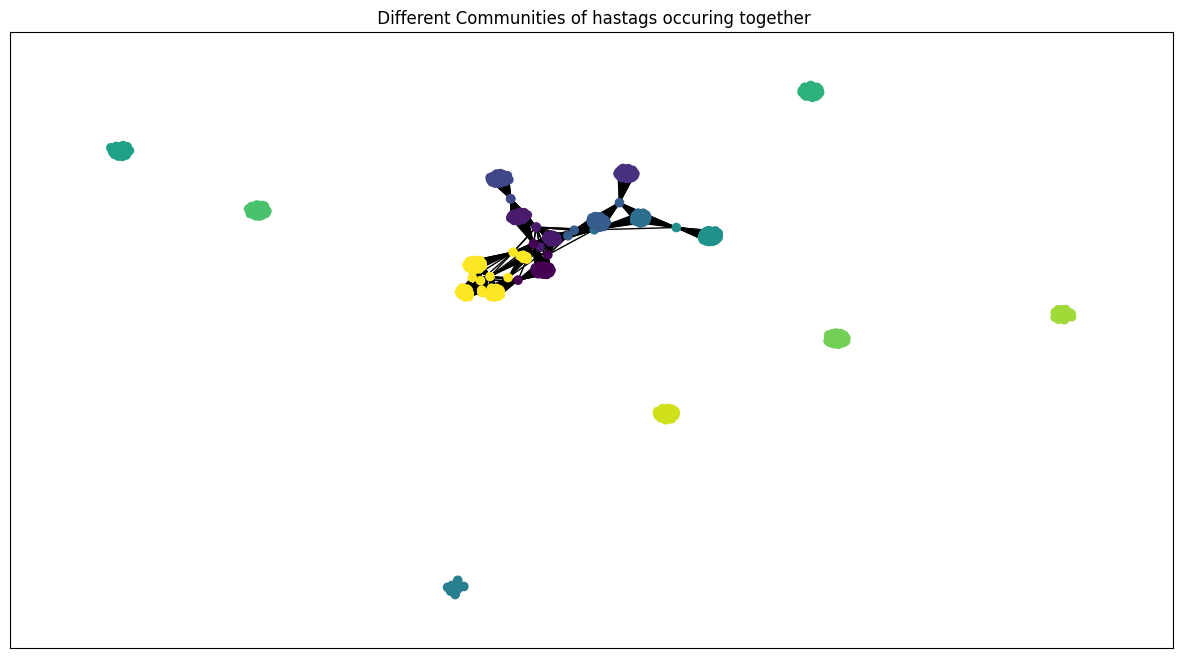

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df, 'left', 'right')
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=collections.Counter(values)
sp = nx.spring_layout(G)
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=sp, with_labels=False, node_size=35, node_color=values)
plt.title(f" Different Communities for more than {like_thres} likes on the posts")
plt.show()